In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
df=pd.read_csv('C:\\Users\\benec\\Downloads\\archive (8)\\Inc_Exp_Data.csv')
print(df)

    Mthly_HH_Income  Mthly_HH_Expense  No_of_Fly_Members  Emi_or_Rent_Amt  \
0              5000              8000                  3             2000   
1              6000              7000                  2             3000   
2             10000              4500                  2                0   
3             10000              2000                  1                0   
4             12500             12000                  2             3000   
5             14000              8000                  2                0   
6             15000             16000                  3            35000   
7             18000             20000                  5             8000   
8             19000              9000                  2                0   
9             20000              9000                  4                0   
10            20000             18000                  4             8000   
11            22000             25000                  6            12000   

In [3]:
df=pd.get_dummies(df,columns=['Highest_Qualified_Member'],drop_first=True)
df

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members,Highest_Qualified_Member_Illiterate,Highest_Qualified_Member_Post-Graduate,Highest_Qualified_Member_Professional,Highest_Qualified_Member_Under-Graduate
0,5000,8000,3,2000,64200,1,0,0,0,1
1,6000,7000,2,3000,79920,1,1,0,0,0
2,10000,4500,2,0,112800,1,0,0,0,1
3,10000,2000,1,0,97200,1,1,0,0,0
4,12500,12000,2,3000,147000,1,0,0,0,0
5,14000,8000,2,0,196560,1,0,0,0,0
6,15000,16000,3,35000,167400,1,0,1,0,0
7,18000,20000,5,8000,216000,1,0,0,0,0
8,19000,9000,2,0,218880,1,0,0,0,1
9,20000,9000,4,0,220800,2,0,0,0,1


In [5]:
X = df.drop('Mthly_HH_Income', axis=1)  # Features
y = df['Mthly_HH_Income']  # Target

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


In [8]:
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [9]:
y_pred_rf = rf_classifier.predict(X_test)


In [13]:
report_rf = classification_report(y_test, y_pred_rf)
print(report_rf)


              precision    recall  f1-score   support

       20000       0.00      0.00      0.00         0
       24000       1.00      1.00      1.00         1
       25000       0.00      0.00      0.00         1
       30000       0.00      0.00      0.00         1
       32000       0.00      0.00      0.00         0
       35000       0.00      0.00      0.00         1
       39000       0.00      0.00      0.00         1
       40000       0.00      0.00      0.00         0
       42000       0.00      0.00      0.00         0
       45000       0.00      0.00      0.00         2
       55000       0.00      0.00      0.00         0
       60000       0.00      0.00      0.00         1
       70000       0.00      0.00      0.00         0
       90000       0.00      0.00      0.00         1
      100000       0.00      0.00      0.00         1

    accuracy                           0.10        10
   macro avg       0.07      0.07      0.07        10
weighted avg       0.10   

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_cla

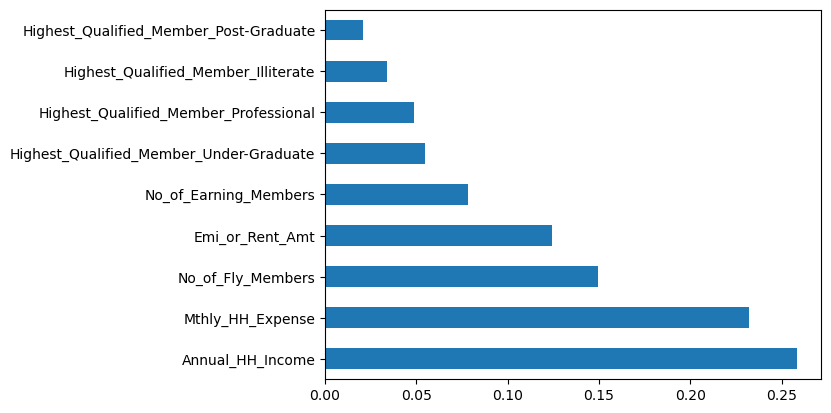

In [11]:
feature_importances = pd.Series(rf_classifier.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()